In [ ]:
import pandas as pd

# Baca setiap dataset
data = pd.read_csv('/content/proporsi_hasil_kmeans.csv')
data.head()

,No,Kode Kemdagri,Kode BPS,Provinsi,Tersedia_Mean,Tidak tersedia_Mean,Persentase_Baru,Cluster
0,1,11.0,11.0,Aceh,976.6,145.4,87.04,Menengah
1,2,12.0,12.0,Sumatera Utara,2470.2,442.0,84.82,Menengah
2,3,13.0,13.0,Sumatera Barat,1020.2,145.2,87.54,Menengah
3,4,14.0,14.0,Riau,1076.4,93.6,92.00,Tinggi
4,5,15.0,15.0,Jambi,637.0,83.8,88.37,Menengah


In [ ]:
# Membuat DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
selected_columns = ['Provinsi', 'Tersedia_Mean', 'Tidak tersedia_Mean', 'Persentase_Baru']
df = data[selected_columns]
df.head()

,Provinsi,Tersedia_Mean,Tidak tersedia_Mean,Persentase_Baru
0,Aceh,976.6,145.4,87.04
1,Sumatera Utara,2470.2,442.0,84.82
2,Sumatera Barat,1020.2,145.2,87.54
3,Riau,1076.4,93.6,92.00
4,Jambi,637.0,83.8,88.37


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
df = pd.DataFrame(data)

# Encoding the target variable
df["Cluster_Encoded"] = df["Cluster"].map({"Tinggi": 2, "Menengah": 1, "Rendah": 0})

In [ ]:
# Prepare the dataset
data_cleaned = data.dropna()  # Remove rows with missing values

# Features (independent variables)
X = data_cleaned[['Tersedia_Mean', 'Tidak tersedia_Mean', 'Persentase_Baru']]

# Target (dependent variable)
y = data_cleaned['Cluster']

In [ ]:
# Encode the target variable (Cluster)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.tree import export_text

# Export the decision tree structure as text
tree_rules = export_text(decision_tree, feature_names=list(X.columns))
tree_rules

'|--- Persentase_Baru <= 90.83\n|   |--- Persentase_Baru <= 77.37\n|   |   |--- class: 1\n|   |--- Persentase_Baru >  77.37\n|   |   |--- class: 0\n|--- Persentase_Baru >  90.83\n|   |--- class: 2\n'

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Membagi dataset menjadi data latih (80%) dan data uji (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=42)

# Melatih model Decision Tree
decision_tree.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = decision_tree.predict(X_test)

In [ ]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Accuracy of the model:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy of the model: 0.8571428571428571

Confusion Matrix:
[[4 2 0]
 [0 2 0]
 [0 0 6]]

Classification Report:
              precision    recall  f1-score   support

    Menengah       1.00      0.67      0.80         6
      Rendah       0.50      1.00      0.67         2
      Tinggi       1.00      1.00      1.00         6

    accuracy                           0.86        14
   macro avg       0.83      0.89      0.82        14
weighted avg       0.93      0.86      0.87        14



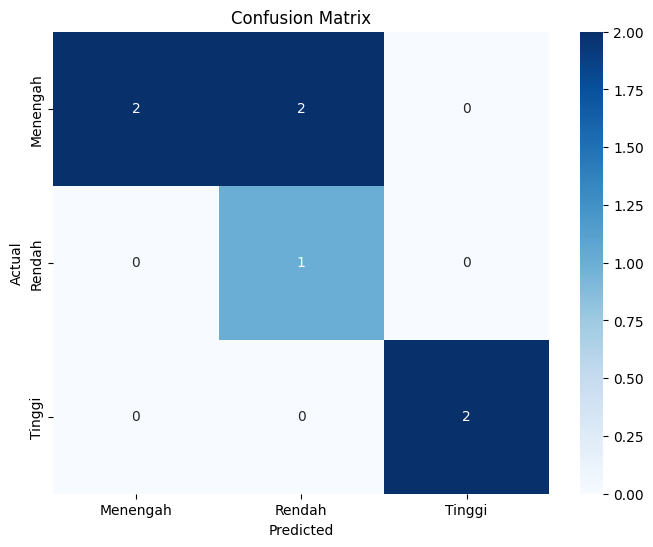

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=decision_tree.classes_, yticklabels=decision_tree.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Membaca dataset
# Pastikan file CSV kamu sudah terformat sesuai dengan variabel yang diinginkan
data = pd.read_csv("/content/proporsi_hasil_kmeans.csv")

Struktur Pohon Keputusan:
|--- Persentase_Baru <= 90.83
|   |--- Persentase_Baru <= 75.49
|   |   |--- class: Rendah
|   |--- Persentase_Baru >  75.49
|   |   |--- class: Menengah
|--- Persentase_Baru >  90.83
|   |--- class: Tinggi


Accuracy of the model: 1.0

Confusion Matrix:
[[3 0 0]
 [0 2 0]
 [0 0 2]]

Classification Report:
              precision    recall  f1-score   support

    Menengah       1.00      1.00      1.00         3
      Rendah       1.00      1.00      1.00         2
      Tinggi       1.00      1.00      1.00         2

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



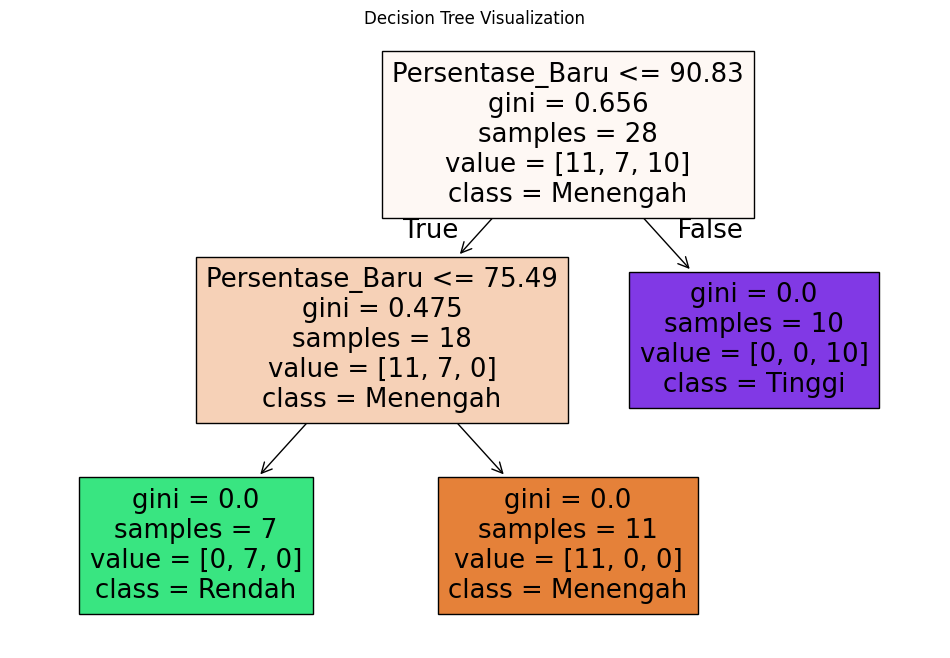


Distribusi Data Aktual:
Cluster
Menengah    3
Tinggi      2
Rendah      2
Name: count, dtype: int64

Distribusi Data Hasil Klasifikasi:
Menengah    3
Tinggi      2
Rendah      2
Name: count, dtype: int64


In [ ]:
# Menentukan variabel independen (X) dan dependen (y)
X = data[["Tersedia_Mean", "Tidak tersedia_Mean", "Persentase_Baru"]]  # Fitur
y = data["Cluster"]  # Target

# Membagi data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Melatih model Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Struktur pohon keputusan
tree_rules = export_text(decision_tree, feature_names=list(X.columns))
print("Struktur Pohon Keputusan:")
print(tree_rules)

# Prediksi pada data uji
y_pred = decision_tree.predict(X_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of the model: {accuracy}")

# Menampilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Menampilkan classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# Visualisasi Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, feature_names=X.columns, class_names=decision_tree.classes_, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# Validasi hasil clustering dengan distribusi data aktual
print("\nDistribusi Data Aktual:")
print(y_test.value_counts())

print("\nDistribusi Data Hasil Klasifikasi:")
print(pd.Series(y_pred).value_counts())

Struktur Pohon Keputusan:
|--- Persentase_Baru <= 75.49
|   |--- class: Rendah
|--- Persentase_Baru >  75.49
|   |--- Persentase_Baru <= 90.83
|   |   |--- class: Menengah
|   |--- Persentase_Baru >  90.83
|   |   |--- class: Tinggi

Accuracy of the model: 1.0

Confusion Matrix:
[[5 0 0]
 [0 3 0]
 [0 0 6]]

Classification Report:
              precision    recall  f1-score   support

    Menengah       1.00      1.00      1.00         5
      Rendah       1.00      1.00      1.00         3
      Tinggi       1.00      1.00      1.00         6

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14


Distribusi Data Aktual:
Cluster
Tinggi      6
Menengah    5
Rendah      3
Name: count, dtype: int64

Distribusi Data Hasil Klasifikasi:
Tinggi      6
Menengah    5
Rendah      3
Name: count, dtype: int64


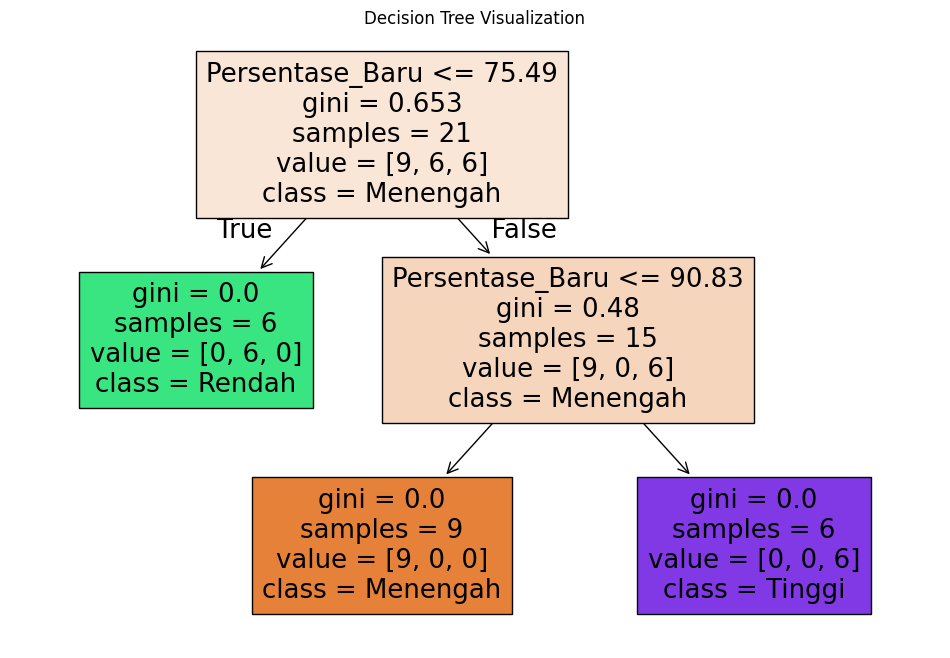

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0., random_state=42)

# Melatih model Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Struktur pohon keputusan
tree_rules = export_text(decision_tree, feature_names=list(X.columns))
print("Struktur Pohon Keputusan:")
print(tree_rules)

# Prediksi pada data uji
y_pred = decision_tree.predict(X_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy}")

# Menampilkan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Menampilkan classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# Validasi hasil clustering dengan data aktual
# Ini contoh sederhana: membandingkan distribusi data aktual dengan hasil klasifikasi
print("\nDistribusi Data Aktual:")
print(y_test.value_counts())

print("\nDistribusi Data Hasil Klasifikasi:")
print(pd.Series(y_pred).value_counts())

# Visualisasi Decision Tree (opsional, jika ingin menampilkan pohon keputusan)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(decision_tree, feature_names=X.columns, class_names=decision_tree.classes_, filled=True)
plt.title("Decision Tree Visualization")
plt.show()


In [ ]:
accuracy

1.0